In [19]:
import json

# 读取 txt 文件，创建 entity_id 和数字之间的映射字典
txt_file = 'entities.txt'
entity_id_map = {}

with open(txt_file, 'r') as f:
    for line in f:
        number, entity_id = line.strip().split()
        entity_id_map[entity_id] = number

# 读取 json 文件
json_file = 'entities.json'

with open(json_file, 'r') as f:
    json_data = json.load(f)

# 用于存储结果的列表
output_data = []

# 找到 entity 和 entity_id 对应的数字
for entry in json_data:
    entity_id = entry['entity_id']
    corresponding_number = entity_id_map.get(entity_id, None)
    
    if corresponding_number:
        # 将找到的结果添加到输出列表中
        output_data.append({
            'entity': entry['entity'],
            'entity_id': entity_id,
            'corresponding_number': corresponding_number
        })

# 将结果写入新的 JSON 文件
output_file = 'output_entities.json'
with open(output_file, 'w',encoding='utf-8') as f:
    json.dump(output_data, f, ensure_ascii=False,indent=4)

print(f'结果已保存到 {output_file}')


结果已保存到 output_entities.json


In [11]:
#将simkgc的文本文件替换为数字
import json

# 读取 output_entities.json 文件，构建实体名称和对应数字的映射字典
with open('output_entities.json', 'r',encoding='utf-8') as f:
    entity_map = {entry['entity']: entry['corresponding_number'] for entry in json.load(f)}

# 构建关系的映射字典
relation_dict = {
    0: 'avoid eating',
    1: 'good to eat'
}
# 创建关系反向映射 (从文本到数字)
relation_map = {v: k for k, v in relation_dict.items()}

# 读取需要修改的 JSON 文件
json_file = "medical_eng_originbert_nofilter_valid6000.json"

with open(json_file, 'r',encoding='utf-8') as f:
    data = json.load(f)

# 替换 head, tail, pred_tail, relation，并处理 topk_score_info
for entry in data:
    # 替换 head, tail, 和 pred_tail
    entry['head'] = entity_map.get(entry['head'], entry['head'])
    entry['tail'] = entity_map.get(entry['tail'], entry['tail'])
    entry['pred_tail'] = entity_map.get(entry['pred_tail'], entry['pred_tail'])

    # 替换 relation
    relation = entry['relation']
    entry['relation'] = relation_map.get(relation, relation)

    # 替换 topk_score_info 中的实体名称
    if 'topk_score_info' in entry:
        try:
            # 解析 topk_score_info 字符串为 JSON
            topk_score_info = json.loads(entry['topk_score_info'])

            # 替换 topk_score_info 中的实体名称为对应的数字
            updated_topk_score_info = {}
            for k, v in topk_score_info.items():
                # 检查是否存在映射，如果没有，记录或者跳过
                if k in entity_map:
                    updated_topk_score_info[entity_map[k]] = v
                else:
                    # 如果找不到映射，可以记录未替换的实体
                    print(f"未找到映射的实体: {k}")
                    updated_topk_score_info[k] = v  # 保留原始键

            # 将更新后的字典重新转换为字符串
            entry['topk_score_info'] = json.dumps(updated_topk_score_info)
        except json.JSONDecodeError:
            print(f"Error decoding topk_score_info for entry: {entry}")

# 将更新后的 JSON 文件保存
output_file = 'originbert_valid_text2id.json'
with open(output_file, 'w',encoding='utf-8') as f:
    json.dump(data, f, indent=4)

print(f'替换后的 JSON 文件已保存为 {output_file}')


替换后的 JSON 文件已保存为 originbert_valid_text2id.json


In [16]:
import json

# 示例 JSON 数据
json_data = '{"name": "pancreatic islet function \\u03b2-cell \\u5c3e,c pancreatic islet function \u5c3e-cell tumor"}'

# 解析 JSON
parsed_data = json.loads(json_data)

# 输出结果
print(parsed_data['name'])


pancreatic islet function β-cell 尾,c pancreatic islet function 尾-cell tumor


In [ ]:
with open('output_entities.json', 'r') as f:
    entity_map = {entry['entity']: entry['corresponding_number'] for entry in json.load(f)}

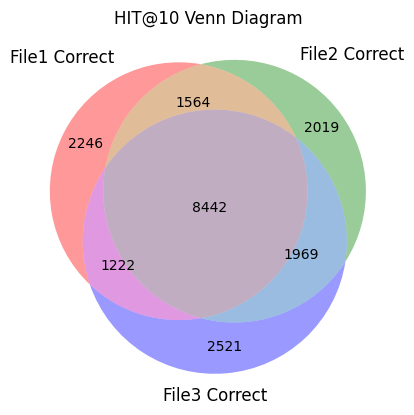

In [3]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
file_names = [r"D:\分数文件\DDI数据\bert系列\originbert_valid_text2id.json", r"D:\分数文件\DDI数据\bert系列\biobert_valid_text2id.json", r"D:\分数文件\DDI数据\bert系列\pubmedbert_valid_text2id.json"]

# 存储每个文件的预测正确样本集合
correct_sets = []

for file_name in file_names:
    with open(file_name, "r") as f:
        data = json.load(f)
    
    # 提取预测正确的样本
    correct_set = set(
        (entry["head"], entry["relation"], entry["tail"])
        for entry in data if entry["rank"] <= 10
    )
    correct_sets.append(correct_set)

# 解包集合
set1, set2, set3 = correct_sets

# 绘制文氏图
venn = venn3(
    [set1, set2, set3],
    ("File1 Correct", "File2 Correct", "File3 Correct")
)

plt.title("HIT@10 Venn Diagram")
plt.show()


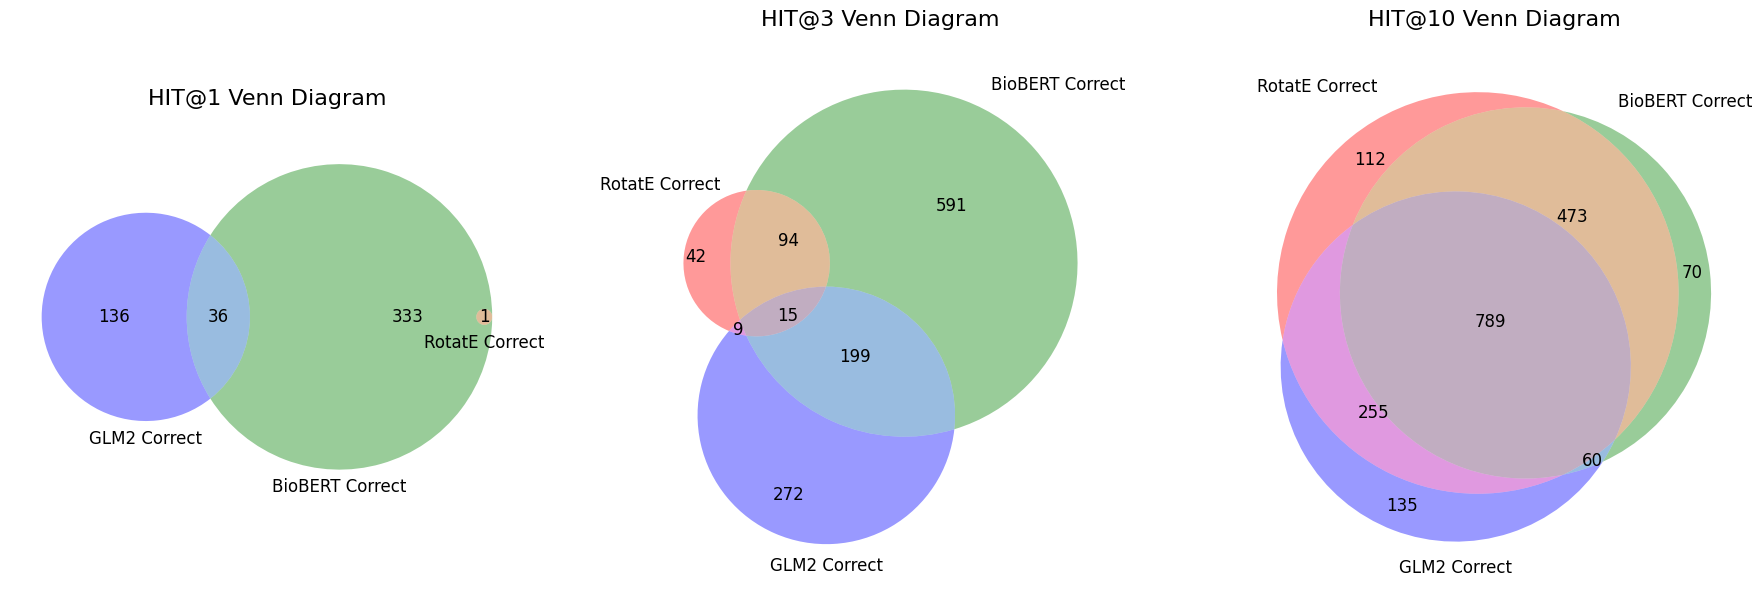

In [2]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
#file_names = ["D:/分数文件/DDI数据/transe系列/rotate_DDI_valid_reorder.json", "D:/分数文件/DDI数据/bert系列/biobert_valid_text2id.json", "D:/分数文件/DDI数据/LLM记录/LLM_final/LLM_DDI_valid_glm4+10000+5e-3.json"]
file_names = [r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\test\rotate_test_reorder.json", r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\test\bio_test_text2id.json", r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\test\LLMrotatetop20_test_glm2+10000+1e-2+noprompt.json"]                            
# HIT 阈值列表
#file_names = ["originbert_valid_text2id.json", "biobert_valid_text2id.json", "pubmedbert_valid_text2id.json"]
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 创建子图
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 绘制每个 HIT 的文氏图
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # 绘制文氏图
    plt.sca(axes[i])  # 切换到第 i 个子图
    venn = venn3(
        [set1, set2, set3],
        ("RotatE Correct", "BioBERT Correct", "GLM2 Correct")
    )
    for text in venn.set_labels + venn.subset_labels:
        if text is not None:
            text.set_fontsize(12)  # 所有文字放大到14pt
    
    # 调整标题和标签
    plt.title(f"HIT@{hit_threshold} Venn Diagram", fontsize=16, pad=20)
    plt.gca().set_facecolor('white')  # 设置白色背景更清晰

# 调整布局并显示
plt.tight_layout()
plt.show()


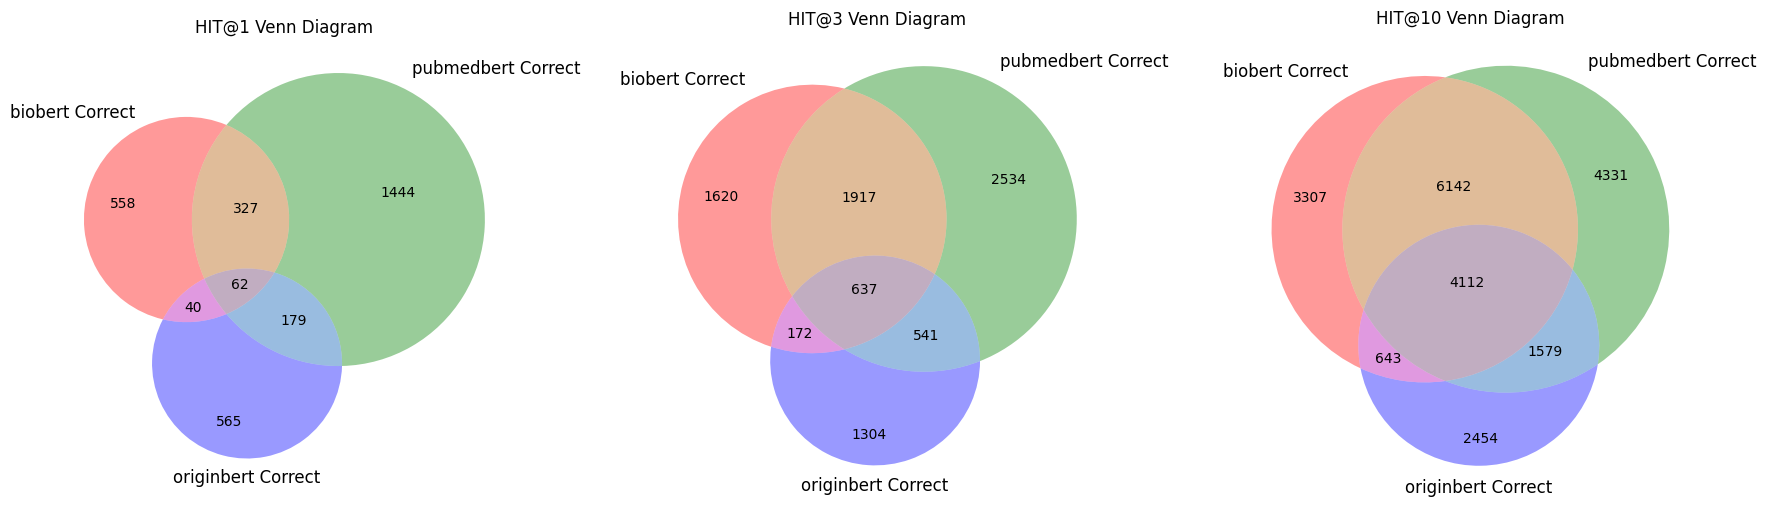

In [5]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["transe_DDI_valid_reorder.json", "rotate_DDI_valid_reorder.json", "distmult_DDI_valid_reorder.json"]

# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本
        correct_set = set(
            (entry["head"], entry["relation"], entry["tail"])
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 创建子图
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 绘制每个 HIT 的文氏图
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # 绘制文氏图
    plt.sca(axes[i])  # 切换到第 i 个子图
    venn = venn3(
        [set1, set2, set3],
        ("biobert Correct", "pubmedbert Correct", "originbert Correct")
    )
    plt.title(f"HIT@{hit_threshold} Venn Diagram")

# 调整布局并显示
plt.tight_layout()
plt.show()


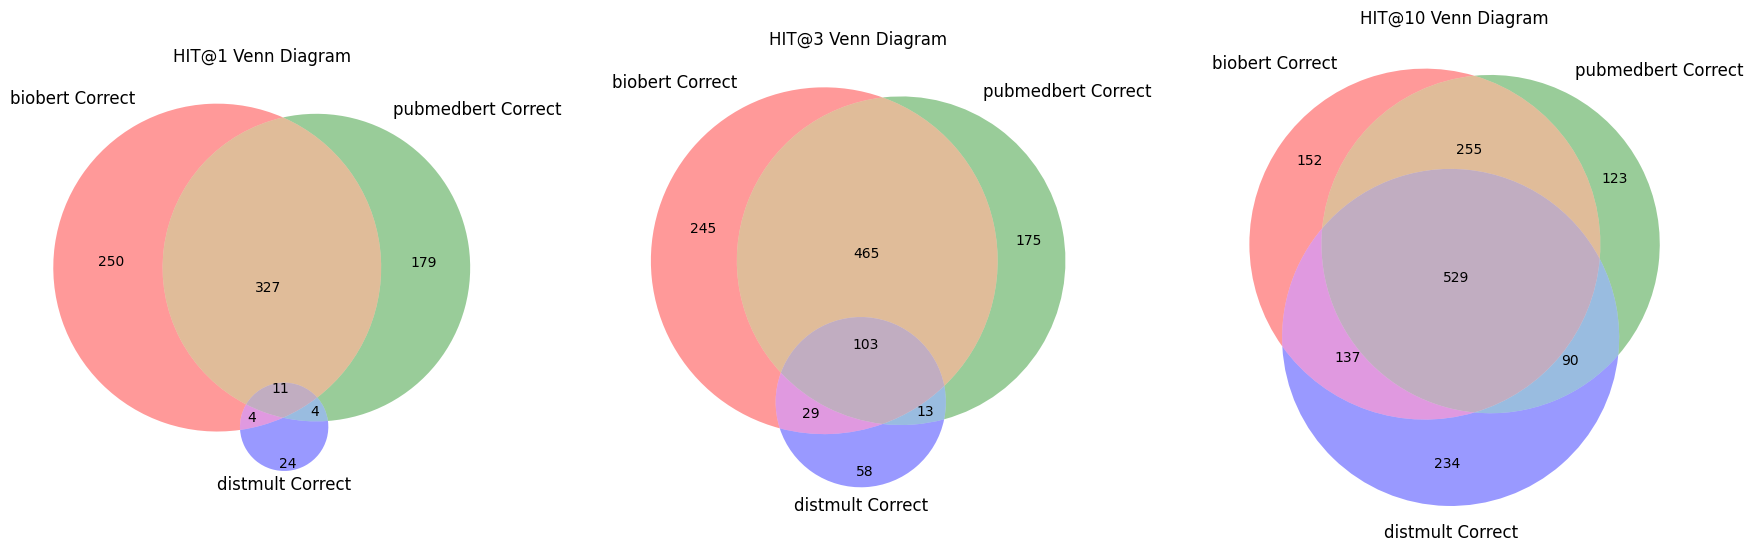

In [82]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["biobert_text2id.json", "pubmedbert_text2id.json", "distmult_reorder.json"]

# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 创建子图
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 绘制每个 HIT 的文氏图
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # 绘制文氏图
    plt.sca(axes[i])  # 切换到第 i 个子图
    venn = venn3(
        [set1, set2, set3],
        ("biobert Correct", "pubmedbert Correct", "distmult Correct")
    )
    plt.title(f"HIT@{hit_threshold} Venn Diagram")

# 调整布局并显示
plt.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:107: UserWarning: Circle B has zero area.
  warnings.warn("Circle B has zero area.")


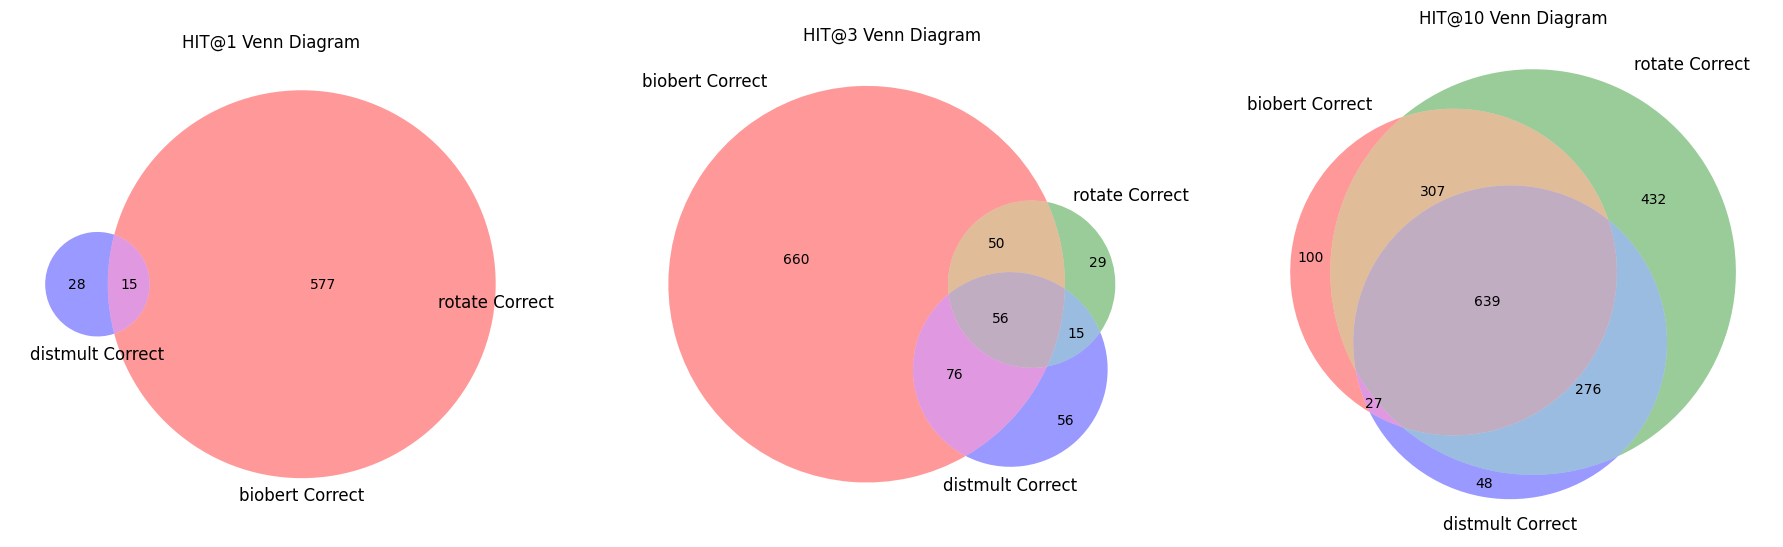

In [84]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["biobert_text2id.json", "rotate_reorder.json", "distmult_reorder.json"]

# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 创建子图
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 绘制每个 HIT 的文氏图
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # 绘制文氏图
    plt.sca(axes[i])  # 切换到第 i 个子图
    venn = venn3(
        [set1, set2, set3],
        ("biobert Correct", "rotate Correct", "distmult Correct")
    )
    plt.title(f"HIT@{hit_threshold} Venn Diagram")

# 调整布局并显示
plt.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:107: UserWarning: Circle B has zero area.
  warnings.warn("Circle B has zero area.")
D:\Anaconda\lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


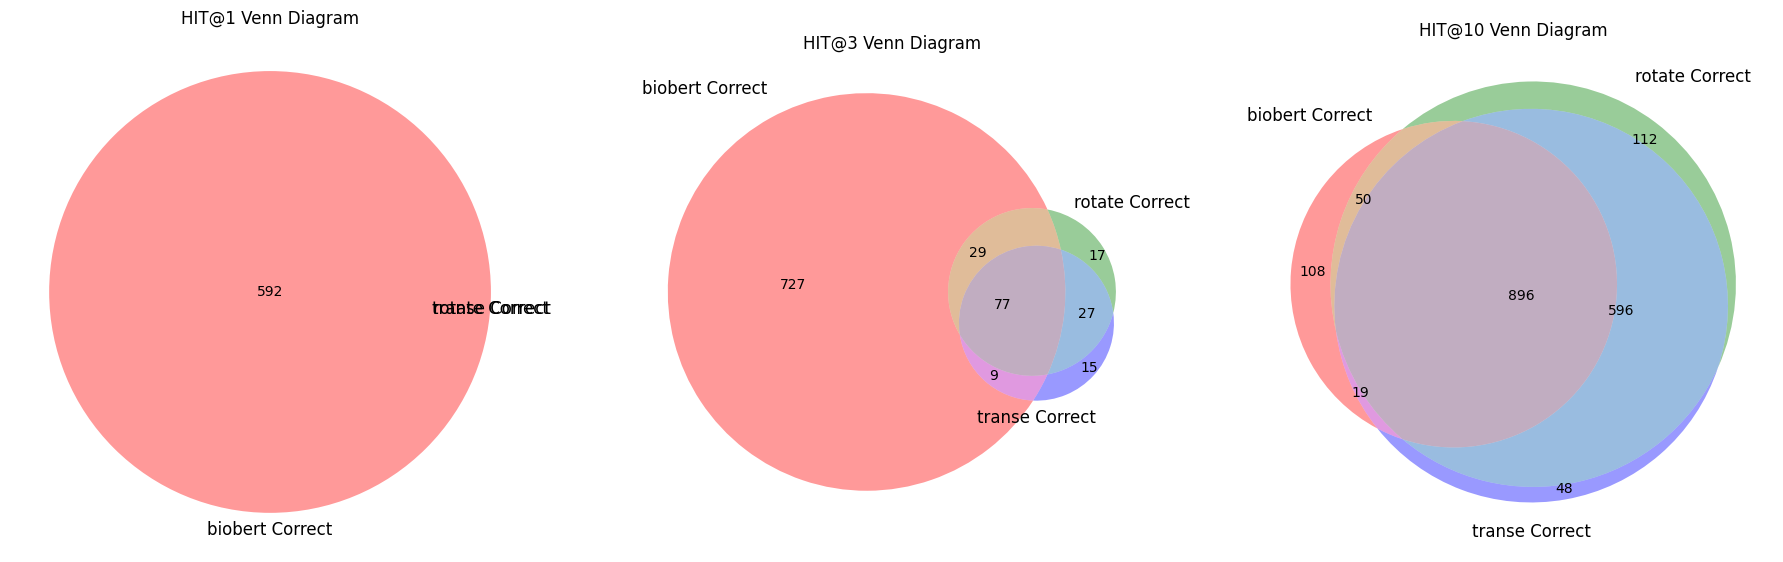

In [6]:
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["biobert_text2id.json", "rotate_reorder.json", "transe_reorder.json"]

# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 创建子图
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 绘制每个 HIT 的文氏图
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # 绘制文氏图
    plt.sca(axes[i])  # 切换到第 i 个子图
    venn = venn3(
        [set1, set2, set3],
        ("biobert Correct", "rotate Correct", "transe Correct")
    )
    plt.title(f"HIT@{hit_threshold} Venn Diagram")

# 调整布局并显示
plt.tight_layout()
plt.show()

In [9]:
len(set2)

1654

C:\Users\David\AppData\Local\Temp\ipykernel_26884\2626681344.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


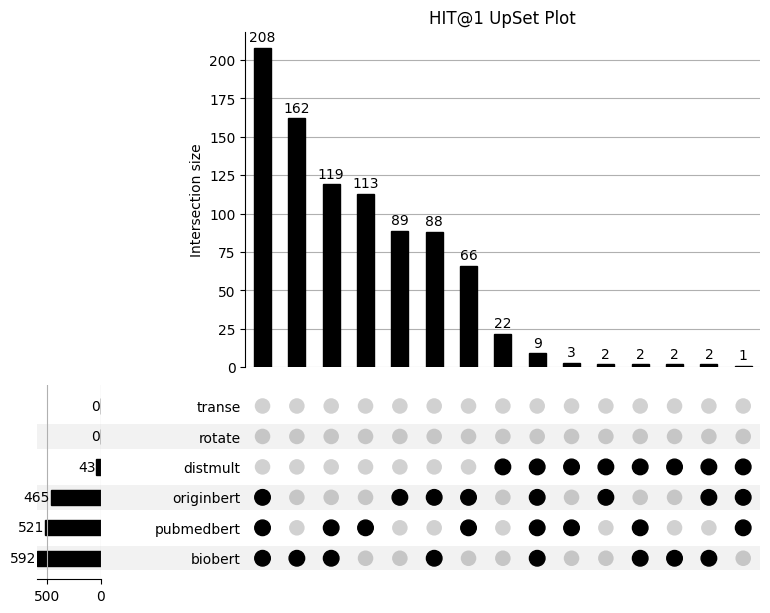

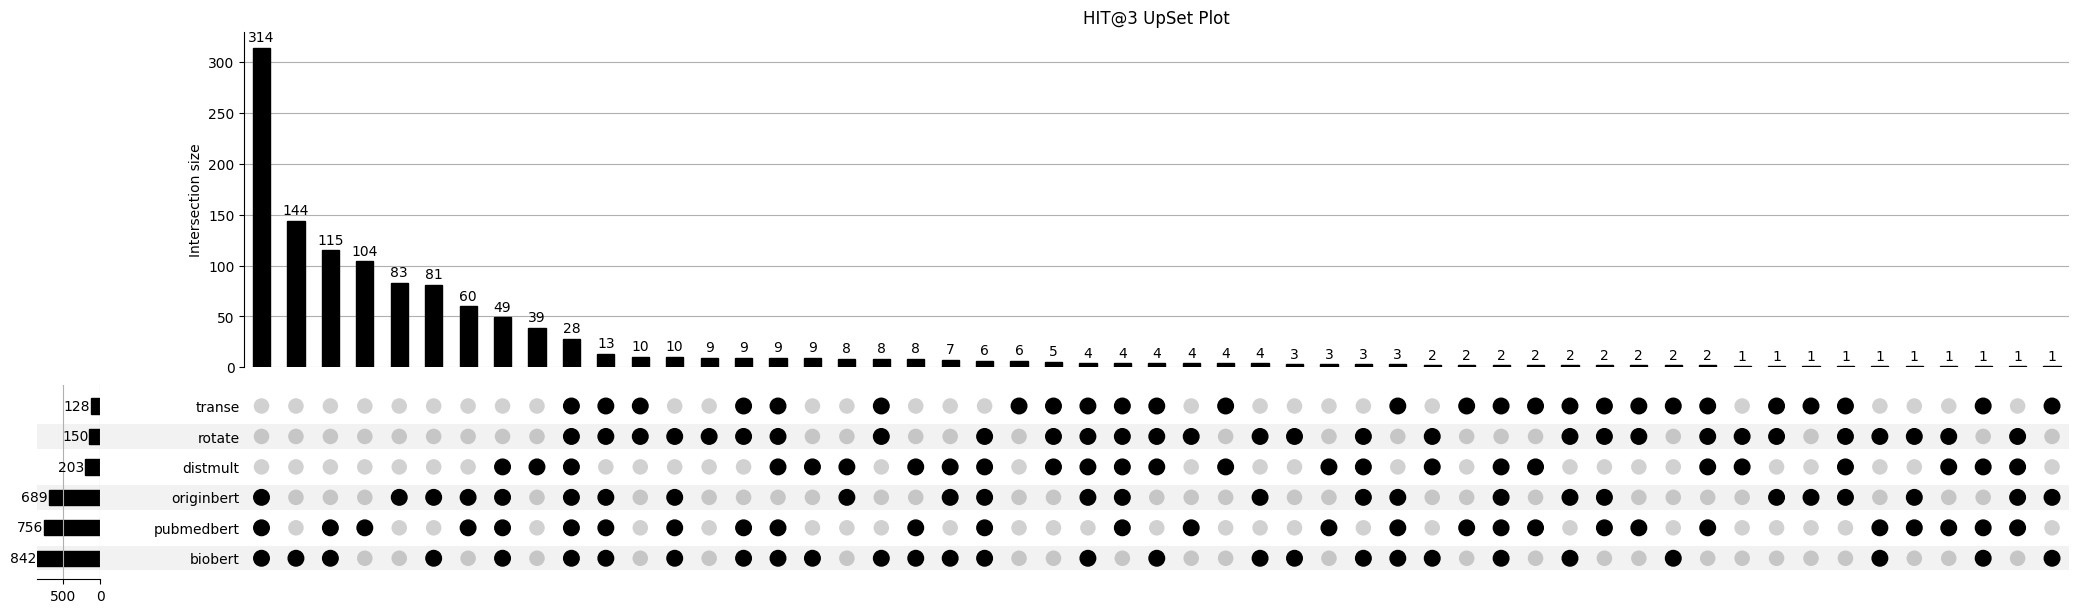

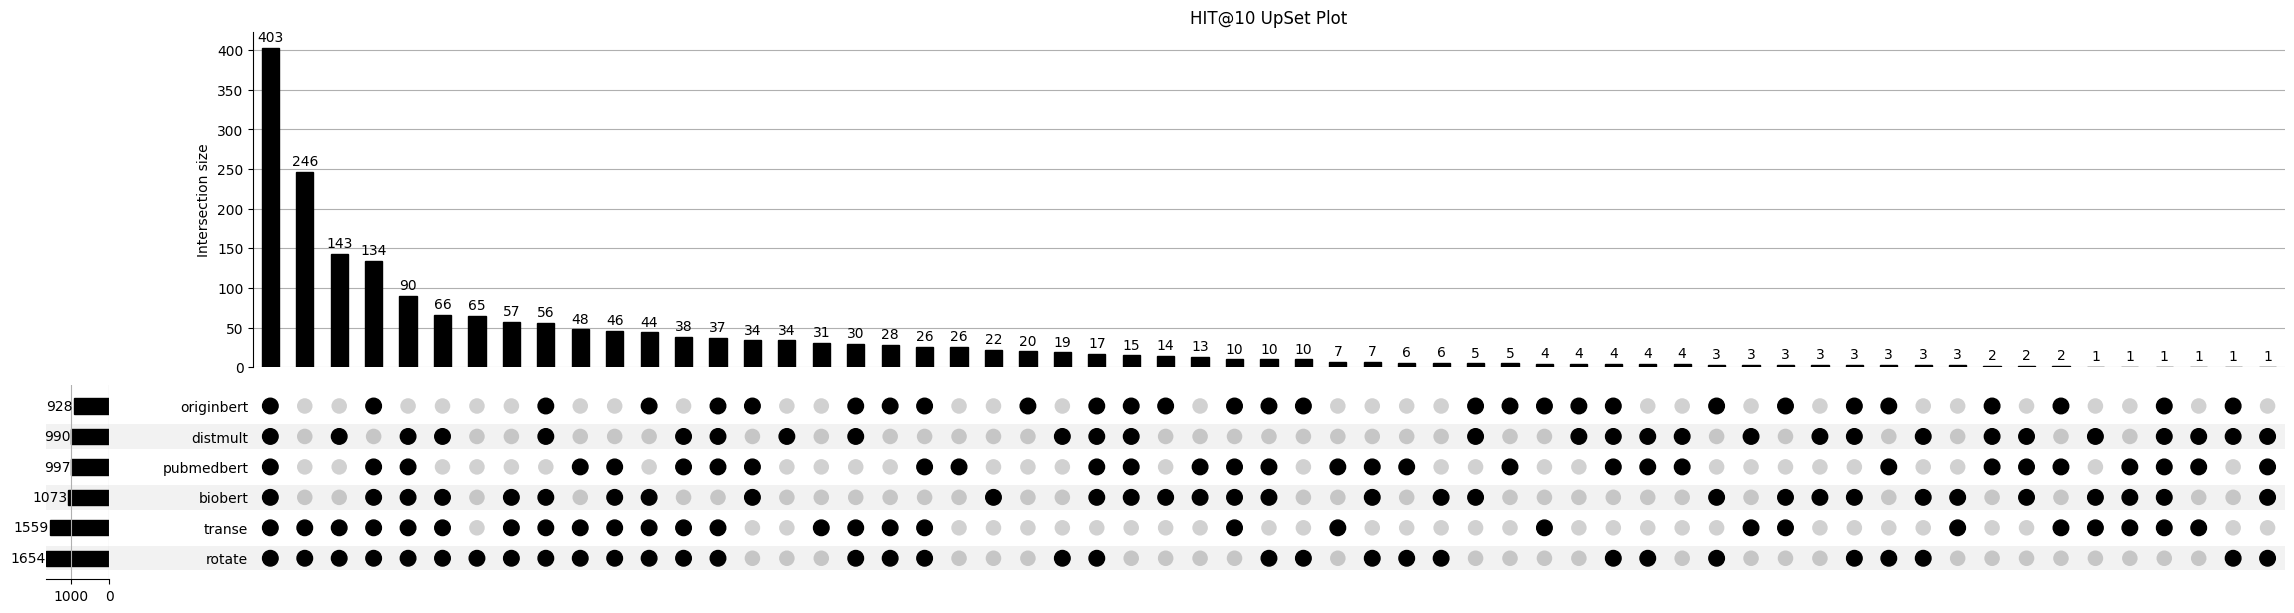

In [1]:
import json
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
from upsetplot import generate_counts, plot

# 文件名列表
#file_names = ["biobert_text2id.json", "rotate_reorder.json", "transe_reorder.json"]
file_names = ["biobert_text2id.json", "pubmedbert_text2id.json", "originbert_text2id.json", "distmult_reorder.json", "rotate_reorder.json", "transe_reorder.json"]
# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 准备数据并绘制 UpSet 图
#fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 遍历每个 HIT 阈值
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    sets = get_correct_sets(file_names, hit_threshold)  # 返回一个包含 6 个集合的列表

    # 合并集合数据
    all_elements = set.union(*sets)  # 获取所有集合的并集
    data = {tuple([False] * len(sets)): 0}  # 初始化默认值，长度与集合数量匹配

    # 统计每个组合出现的次数
    for entry in all_elements:
        key = tuple(entry in s for s in sets)  # 动态生成每个 entry 的键
        if key not in data:
            data[key] = 0
        data[key] += 1  # 检查 entry 是否在每个集合中

    # 转为 DataFrame 供 UpSetPlot 使用
    df = pd.Series(data)
    df.index = pd.MultiIndex.from_tuples(df.index, names=["biobert", "pubmedbert", "originbert","distmult", "rotate", "transe"])
    df = df[df > 0]  # 过滤掉空的组合
    
    # 绘制 UpSet 图
    #plt.sca(axes[i])  # 切换到第 i 个子图
    plot(df, show_counts=True, intersection_plot_elements=10,sort_by = 'cardinality')
    plt.title(f"HIT@{hit_threshold} UpSet Plot")

# 调整布局并显示
plt.tight_layout()
plt.show()



C:\Users\David\AppData\Local\Temp\ipykernel_22008\2331023652.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


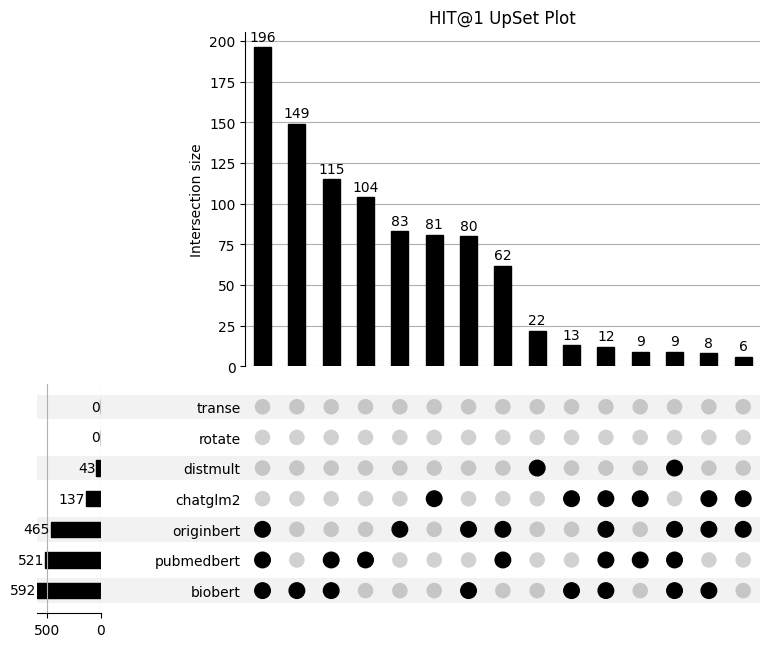

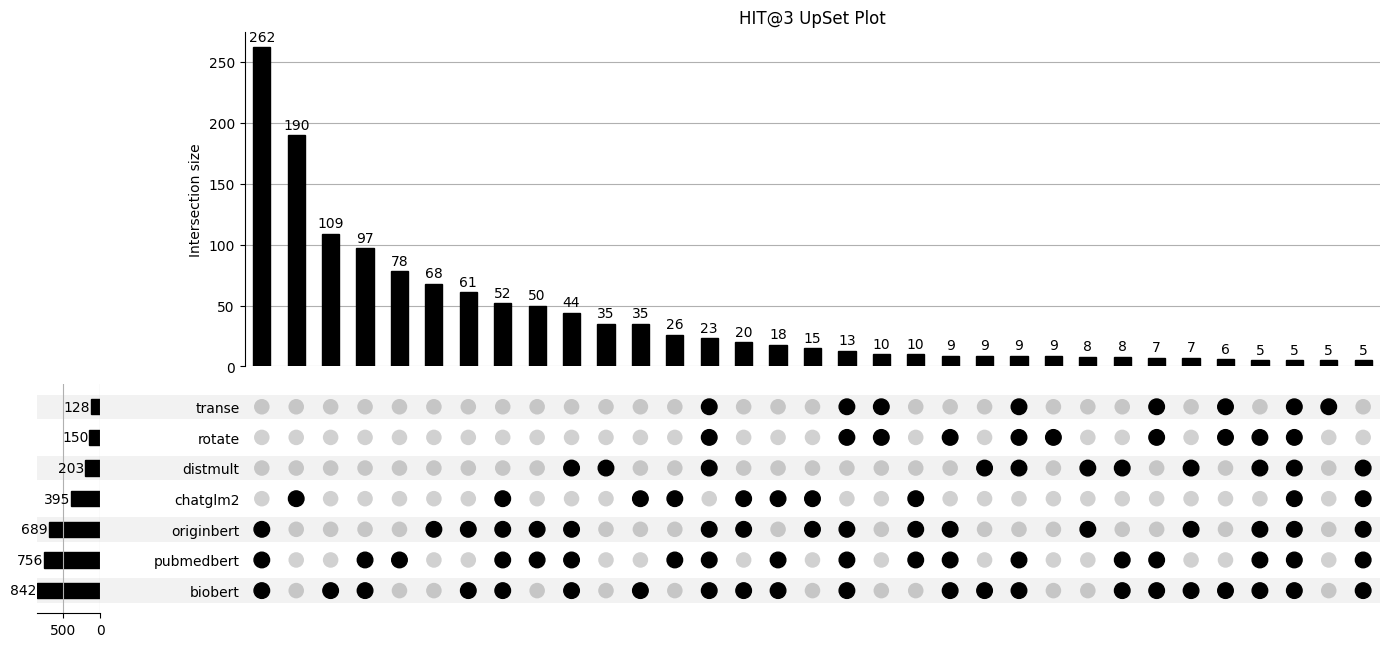

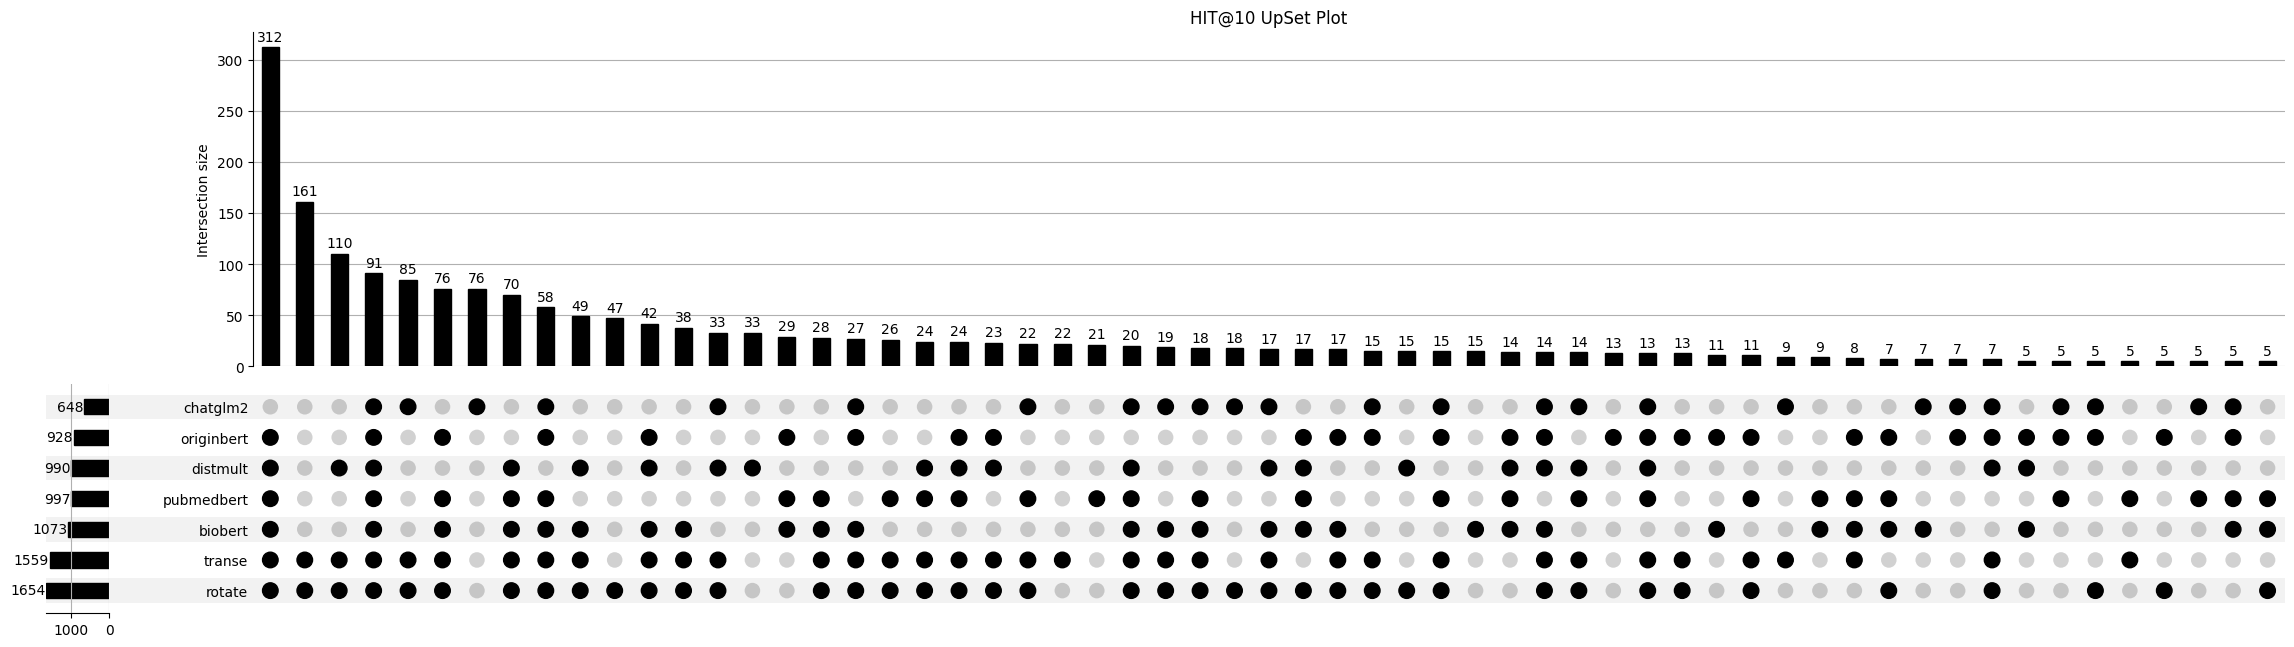

In [ ]:
import json
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
from upsetplot import generate_counts, plot

# 文件名列表
#file_names = ["biobert_text2id.json", "rotate_reorder.json", "transe_reorder.json"]
file_names = [r"D:\分数文件\DDI数据\bert系列\originbert_valid_text2id.json", r"D:\分数文件\DDI数据\bert系列\pubmedbert_valid_text2id.json", r"D:\分数文件\DDI数据\bert系列\biobert_valid_text2id.json", "transe_DDI_valid_reorder.json", "rotate_DDI_valid_reorder", "distmult_DDI_valid_reorder","output_medicaleng_once(glm2 prob).json"]
# HIT 阈值列表
hit_thresholds = [1, 3, 10]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 准备数据并绘制 UpSet 图
#fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 遍历每个 HIT 阈值
for i, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    sets = get_correct_sets(file_names, hit_threshold)  # 返回一个包含 6 个集合的列表

    # 合并集合数据
    all_elements = set.union(*sets)  # 获取所有集合的并集
    data = {tuple([False] * len(sets)): 0}  # 初始化默认值，长度与集合数量匹配

    # 统计每个组合出现的次数
    for entry in all_elements:
        key = tuple(entry in s for s in sets)  # 动态生成每个 entry 的键
        if key not in data:
            data[key] = 0
        data[key] += 1  # 检查 entry 是否在每个集合中

    # 转为 DataFrame 供 UpSetPlot 使用
    df = pd.Series(data)
    df.index = pd.MultiIndex.from_tuples(df.index, names=["biobert", "pubmedbert", "originbert","distmult", "rotate", "transe","chatglm2"])
    df = df[df > 0]  # 过滤掉空的组合
    
    # 绘制 UpSet 图
    #plt.sca(axes[i])  # 切换到第 i 个子图
    plot(df, show_counts=True, intersection_plot_elements=10,sort_by = 'cardinality',min_subset_size = 5)
    plt.title(f"HIT@{hit_threshold} UpSet Plot")

# 调整布局并显示
plt.tight_layout()
plt.show()

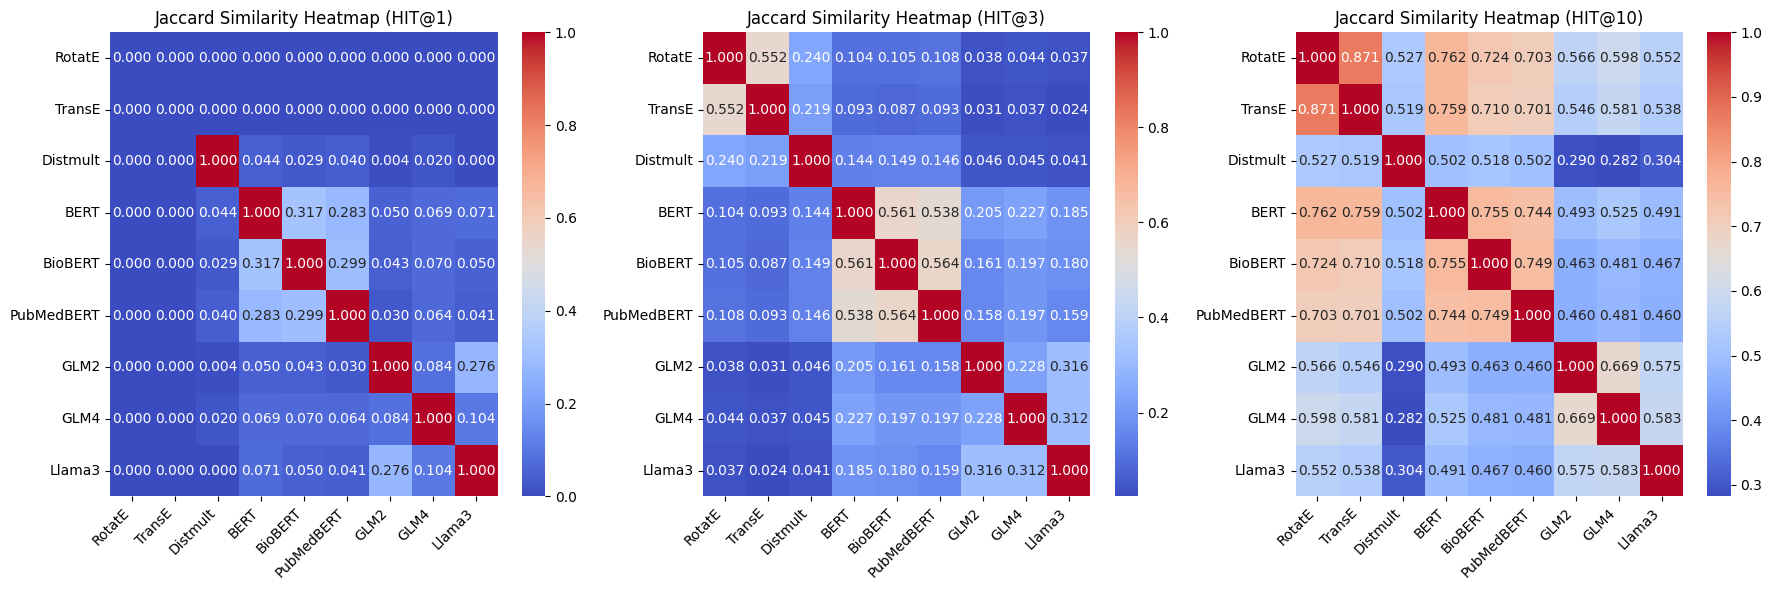

In [7]:
#jaccard
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_names = ['RotatE', 'TransE', 'Distmult', 'BERT', 'BioBERT', 'PubMedBERT',  
              'GLM2', 'GLM4', 'Llama3']
# 文件名列表
file_paths = [r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\rotate_valid_reorder.json", 
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\transe_valid_reorder.json", 
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\distmult_valid_reorder.json", 
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\originbert_final_nofilter_valid_text2id.json", 
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\bio_final_nofilter_valid_text2id.json", 
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\pubmed_final_nofilter_valid_text2id.json",
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\LLMrotatetop20_glm2+10000+1e-2+noprompt.json",
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\LLMrotatetop20_glm4+12000+lr5e-3+noprompt.json",
              r"E:\serverfiles\medicalkg\Medicalkg_final_score\raw\valid\LLMrotatetop20_llama3+10000+5e-5+engprompt+cot.json"]

# 函数：计算给定阈值的预测正确集合
def get_correct_sets(file_paths, hit_threshold):
    correct_sets = []
    for file_path in file_paths:
        with open(file_path, "r") as f:
            data = json.load(f)
        
        # 提取预测正确的样本并统一键值为字符串
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# 计算 Jaccard 相似度
def jaccard(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# 设置阈值列表
hit_thresholds = [1, 3, 10]

# 创建子图（3列）
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# 遍历每个 HIT 阈值并绘制对应的 Jaccard 相似度热图
for idx, hit_threshold in enumerate(hit_thresholds):
    # 获取当前阈值的集合
    sets = get_correct_sets(file_paths, hit_threshold)  # 返回一个包含集合的列表
    
    # 创建空的相似度矩阵
    jaccard_matrix = pd.DataFrame(index=file_names, columns=file_names, dtype=float)
    
    # 计算每对模型之间的 Jaccard 相似度
    for i in range(len(file_names)):
        for j in range(i, len(file_names)):
            # 计算相似度并赋值
            jaccard_value = jaccard(sets[i], sets[j])
            jaccard_matrix.iloc[i, j] = jaccard_value
            jaccard_matrix.iloc[j, i] = jaccard_value  # 对称矩阵

    # 绘制 Jaccard 相似度热图到子图
    sns.heatmap(jaccard_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar=True, 
                xticklabels=file_names, yticklabels=file_names, ax=axes[idx])

    # 设置标题
    axes[idx].set_title(f"Jaccard Similarity Heatmap (HIT@{hit_threshold})")
    
    # 横轴标签旋转 45 度
    axes[idx].set_xticklabels(file_names, rotation=45, ha='right')

# 调整布局并显示
plt.tight_layout()
plt.show()

In [12]:
df

biobert  rotate  transe
True     True    True      896
False    True    True      596
         False   True       48
         True    False     112
True     False   False     108
         True    False      50
         False   True       19
dtype: int64

In [6]:
import json

# 读取 JSON 预测数据
with open(r"/Data/SA22001084/OpenKE-OpenKE-PyTorch/result/wn18rr_final/BERT/pubmedbert_test_text2id.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 读取训练集 (head, tail, relation) 并转换格式
train_set = set()
with open("train2id.txt", "r", encoding="utf-8") as f:
    for line in f:
        head, tail, relation = map(int, line.strip().split())
        train_set.add((head, relation, tail))  # (head, relation, tail) 格式

# 计算 filter 前的 hit@K 和 MR
hit1, hit3, hit10, mr ,mrr= 0, 0, 0, 0,0
hit1_f, hit3_f, hit10_f, mr_f,mrr_f = 0, 0, 0, 0,0  # filter 后

for entry in data:
    head, relation, tail = int(entry["head"]), int(entry["relation"]), int(entry["tail"])

    # 解析 topk_score_info，按分数 **升序** 排序（分数越低越好）
    topk_score_info = json.loads(entry["topk_score_info"])
    sorted_tails = sorted(topk_score_info, key=topk_score_info.get, reverse=True)  # bert
    #sorted_tails = sorted(topk_score_info, key=topk_score_info.get) #llm

    # 计算 filter 前指标
    rank = sorted_tails.index(str(tail)) + 1  # 获取 tail 在排序后的索引（+1 是因为 rank 从 1 开始）
    if rank <= 1:
        hit1 += 1
    if rank <= 3:
        hit3 += 1
    if rank <= 10:
        hit10 += 1
    mr += rank  # 直接加上原 rank 计算 MR
    mrr += 1.0 / rank  # MRR累加

    # 计算 filter 后 rank
    filtered_tails = [t for t in sorted_tails if (int(head), int(relation), int(t)) not in train_set]
    if str(tail) in filtered_tails:
        new_rank = filtered_tails.index(str(tail)) + 1  # 新的 rank 计算

        # 计算 filter 后指标
        if new_rank <= 1:
            hit1_f += 1
        if new_rank <= 3:
            hit3_f += 1
        if new_rank <= 10:
            hit10_f += 1
        mr_f += new_rank  # 计算 filter 后 MR
        mrr_f += 1.0 / new_rank

# 计算最终指标
total = len(data)
print(f"Filter 前: MR={mr/total:.2f},MRR={mrr/total:.4f},hit@1={hit1/total:.4f}, hit@3={hit3/total:.4f}, hit@10={hit10/total:.4f}")
print(f"Filter 后: MR={mr_f/total:.2f},MRR={mrr_f/total:.4f},hit@1={hit1_f/total:.4f}, hit@3={hit3_f/total:.4f}, hit@10={hit10_f/total:.4f}")



Filter 前: MR=131.70,MRR=0.5728,hit@1=0.4266, hit@3=0.6761, hit@10=0.8376
Filter 后: MR=128.28,MRR=0.6994,hit@1=0.6047, hit@3=0.7703, hit@10=0.8558


In [15]:

str("193")
print(str("193"))

193


In [8]:
import json

# 读取 JSON 预测数据
with open("filter_rotate_test.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 读取训练集 (head, tail, relation) 并转换格式
train_set = set()
with open("train2id.txt", "r", encoding="utf-8") as f:
    for line in f:
        head, tail, relation = map(int, line.strip().split())
        train_set.add((head, relation, tail))  # (head, relation, tail) 格式

# 计算 filter 前和 filter 后的指标
hit1, hit3, hit10, hit20, hit50, mr = 0, 0, 0, 0, 0, 0
hit1_f, hit3_f, hit10_f, hit20_f, hit50_f, mr_f = 0, 0, 0, 0, 0, 0
filtered_data = []  # 存储 filter 后的数据

for entry in data:
    head, relation, tail = entry["head"], entry["relation"], entry["tail"]

    # 解析 topk_score_info，确保排序按分数升序（分数越低越好）
    topk_score_info = json.loads(entry["topk_score_info"])
    sorted_tails = sorted(topk_score_info, key=topk_score_info.get)  # 低分排前面

    # 计算 filter 前指标
    rank = sorted_tails.index(str(tail)) + 1  # 获取 tail 在排序后的索引（+1 是因为 rank 从 1 开始）
    if rank <= 1:
        hit1 += 1
    if rank <= 3:
        hit3 += 1
    if rank <= 10:
        hit10 += 1
    if rank <= 20:
        hit20 += 1
    if rank <= 50:
        hit50 += 1
    mr += rank  # 计算 MR
    
    # 计算 filter 后 rank
   
    filtered_tails = [t for t in sorted_tails if (head, relation, int(t)) not in train_set]

    new_rank = None
    if str(tail) in filtered_tails:
        new_rank = filtered_tails.index(str(tail)) + 1  # 计算新的 rank

    # 计算 filter 后指标
        if new_rank <= 1:
            hit1_f += 1
        if new_rank <= 3:
            hit3_f += 1
        if new_rank <= 10:
            hit10_f += 1
        if new_rank <= 20:
            hit20_f += 1
        if new_rank <= 50:
            hit50_f += 1
        mr_f += new_rank
    else:
        new_rank = rank  # 如果 tail 被 filter 掉了，保持原 rank

# 更新 JSON 数据
    updated_entry = entry.copy()
    updated_entry["new_rank"] = new_rank  # 记录新的 rank

# **只替换被 filter 掉的 key，而不是全部**
    max_score = max(topk_score_info.values())  # 找到最大分数
    updated_topk_score_info = topk_score_info.copy()  # 复制原字典

# 仅更新被 filter 掉的 key
    for k in topk_score_info:
        if (head, relation, int(k)) in train_set:  # 说明 k 被 filter 掉了
            updated_topk_score_info[k] = max_score  # 仅替换这部分

# **确保排序仍然是按分数升序**
    updated_topk_score_info = dict(sorted(updated_topk_score_info.items(), key=lambda x: x[1]))

    updated_entry["topk_score_info"] = json.dumps(updated_topk_score_info)  # 存回 JSON
    filtered_data.append(updated_entry)

    


    

    

    




# 计算最终指标
total = len(data)
print(f"Filter 前: hit@1={hit1/total:.4f}, hit@3={hit3/total:.4f}, hit@10={hit10/total:.4f}, hit@20={hit20/total:.4f}, hit@50={hit50/total:.4f}, MR={mr/total:.2f}")
print(f"Filter 后: hit@1={hit1_f/total:.4f}, hit@3={hit3_f/total:.4f}, hit@10={hit10_f/total:.4f}, hit@20={hit20_f/total:.4f}, hit@50={hit50_f/total:.4f}, MR={mr_f/total:.2f}")

# 保存 filter 后的 JSON 数据
#with open("filter_rotate_test.json", "w", encoding="utf-8") as f:
#    json.dump(filtered_data, f, indent=4, ensure_ascii=False)

#print("已保存 filter 后的数据到 filter_rotate_valid.json")


Filter 前: hit@1=0.0541, hit@3=0.1260, hit@10=0.2831, hit@20=0.4272, hit@50=0.6707, MR=48.37
Filter 后: hit@1=0.0541, hit@3=0.1260, hit@10=0.2831, hit@20=0.4272, hit@50=0.6707, MR=48.37


In [3]:
#LLM 3.25预测
import json

# 读取 JSON 预测数据
with open(r"D:\分数文件\DDI数据\LLM记录\LLM_rotatetop20_filter_test_glm2+10000.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 读取训练集 (head, tail, relation) 并转换格式
train_set = set()
with open("train2id.txt", "r", encoding="utf-8") as f:
    for line in f:
        head, tail, relation = map(int, line.strip().split())
        train_set.add((head, relation, tail))  # (head, relation, tail) 格式

# 计算 filter 前和 filter 后的指标
hit1, hit3, hit10, hit20, hit50, mr = 0, 0, 0, 0, 0, 0
hit1_f, hit3_f, hit10_f, hit20_f, hit50_f, mr_f = 0, 0, 0, 0, 0, 0
filtered_data = []  # 存储 filter 后的数据

for entry in data:
    head, relation, tail = entry["head"], entry["relation"], entry["tail"]

    # 解析 topk_score_info，确保排序按分数升序（分数越低越好）
    topk_score_info = json.loads(entry["topk_score_info"])
    sorted_tails = sorted(topk_score_info, key=topk_score_info.get)  # 低分排前面

    # 计算 filter 前指标
    rank = sorted_tails.index(str(tail)) + 1  # 获取 tail 在排序后的索引（+1 是因为 rank 从 1 开始）
    if rank <= 1:
        hit1 += 1
    if rank <= 3:
        hit3 += 1
    if rank <= 10:
        hit10 += 1
    if rank <= 20:
        hit20 += 1
    if rank <= 50:
        hit50 += 1
    mr += rank  # 计算 MR
    
    # 计算 filter 后 rank
   
    filtered_tails = [t for t in sorted_tails if (head, relation, int(t)) not in train_set]

    new_rank = None
    if str(tail) in filtered_tails:
        new_rank = filtered_tails.index(str(tail)) + 1  # 计算新的 rank

    # 计算 filter 后指标
        if new_rank <= 1:
            hit1_f += 1
        if new_rank <= 3:
            hit3_f += 1
        if new_rank <= 10:
            hit10_f += 1
        if new_rank <= 20:
            hit20_f += 1
        if new_rank <= 50:
            hit50_f += 1
        mr_f += new_rank
    else:
        new_rank = rank  # 如果 tail 被 filter 掉了，保持原 rank

# 更新 JSON 数据
    updated_entry = entry.copy()
    updated_entry["new_rank"] = new_rank  # 记录新的 rank

# **只替换被 filter 掉的 key，而不是全部**
    max_score = max(topk_score_info.values())  # 找到最大分数
    updated_topk_score_info = topk_score_info.copy()  # 复制原字典

# 仅更新被 filter 掉的 key
    for k in topk_score_info:
        if (head, relation, int(k)) in train_set:  # 说明 k 被 filter 掉了
            updated_topk_score_info[k] = max_score  # 仅替换这部分

# **确保排序仍然是按分数升序**
    updated_topk_score_info = dict(sorted(updated_topk_score_info.items(), key=lambda x: x[1]))

    updated_entry["topk_score_info"] = json.dumps(updated_topk_score_info)  # 存回 JSON
    filtered_data.append(updated_entry)

    


    

    

    




# 计算最终指标
total = len(data)
print(f"Filter 前: hit@1={hit1/total:.4f}, hit@3={hit3/total:.4f}, hit@10={hit10/total:.4f}, hit@20={hit20/total:.4f}, hit@50={hit50/total:.4f}, MR={mr/total:.2f}")
print(f"Filter 后: hit@1={hit1_f/total:.4f}, hit@3={hit3_f/total:.4f}, hit@10={hit10_f/total:.4f}, hit@20={hit20_f/total:.4f}, hit@50={hit50_f/total:.4f}, MR={mr_f/total:.2f}")

# 保存 filter 后的 JSON 数据
#with open("filter_rotate_test.json", "w", encoding="utf-8") as f:
#    json.dump(filtered_data, f, indent=4, ensure_ascii=False)

#print("已保存 filter 后的数据到 filter_rotate_valid.json")


Filter 前: hit@1=0.0102, hit@3=0.0606, hit@10=0.2058, hit@20=0.3609, hit@50=0.5359, MR=71.35
Filter 后: hit@1=0.0275, hit@3=0.0776, hit@10=0.2285, hit@20=0.4272, hit@50=0.6707, MR=49.17


In [4]:

#LLM 3.25预测
import json

# 读取 JSON 预测数据
with open(r"D:\分数文件\DDI数据\LLM记录\filter_rotate_test.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 读取训练集 (head, tail, relation) 并转换格式
train_set = set()
with open("train2id.txt", "r", encoding="utf-8") as f:
    for line in f:
        head, tail, relation = map(int, line.strip().split())
        train_set.add((head, relation, tail))  # (head, relation, tail) 格式

# 计算 filter 前和 filter 后的指标
hit1, hit3, hit10, hit20, hit50, mr = 0, 0, 0, 0, 0, 0
hit1_f, hit3_f, hit10_f, hit20_f, hit50_f, mr_f = 0, 0, 0, 0, 0, 0
filtered_data = []  # 存储 filter 后的数据

for entry in data:
    head, relation, tail = entry["head"], entry["relation"], entry["tail"]

    # 解析 topk_score_info，确保排序按分数升序（分数越低越好）
    topk_score_info = json.loads(entry["topk_score_info"])
    sorted_tails = sorted(topk_score_info, key=topk_score_info.get)  # 低分排前面

    # 计算 filter 前指标
    rank = sorted_tails.index(str(tail)) + 1  # 获取 tail 在排序后的索引（+1 是因为 rank 从 1 开始）
    if rank <= 1:
        hit1 += 1
    if rank <= 3:
        hit3 += 1
    if rank <= 10:
        hit10 += 1
    if rank <= 20:
        hit20 += 1
    if rank <= 50:
        hit50 += 1
    mr += rank  # 计算 MR
    
    # 计算 filter 后 rank
   
    filtered_tails = [t for t in sorted_tails if (head, relation, int(t)) not in train_set]

    new_rank = None
    if str(tail) in filtered_tails:
        new_rank = filtered_tails.index(str(tail)) + 1  # 计算新的 rank

    # 计算 filter 后指标
        if new_rank <= 1:
            hit1_f += 1
        if new_rank <= 3:
            hit3_f += 1
        if new_rank <= 10:
            hit10_f += 1
        if new_rank <= 20:
            hit20_f += 1
        if new_rank <= 50:
            hit50_f += 1
        mr_f += new_rank
    else:
        new_rank = rank  # 如果 tail 被 filter 掉了，保持原 rank

# 更新 JSON 数据
    updated_entry = entry.copy()
    updated_entry["new_rank"] = new_rank  # 记录新的 rank

# **只替换被 filter 掉的 key，而不是全部**
    max_score = max(topk_score_info.values())  # 找到最大分数
    updated_topk_score_info = topk_score_info.copy()  # 复制原字典

# 仅更新被 filter 掉的 key
    for k in topk_score_info:
        if (head, relation, int(k)) in train_set:  # 说明 k 被 filter 掉了
            updated_topk_score_info[k] = max_score  # 仅替换这部分

# **确保排序仍然是按分数升序**
    updated_topk_score_info = dict(sorted(updated_topk_score_info.items(), key=lambda x: x[1]))

    updated_entry["topk_score_info"] = json.dumps(updated_topk_score_info)  # 存回 JSON
    filtered_data.append(updated_entry)

    


    

    

    




# 计算最终指标
total = len(data)
print(f"Filter 前: hit@1={hit1/total:.4f}, hit@3={hit3/total:.4f}, hit@10={hit10/total:.4f}, hit@20={hit20/total:.4f}, hit@50={hit50/total:.4f}, MR={mr/total:.2f}")
print(f"Filter 后: hit@1={hit1_f/total:.4f}, hit@3={hit3_f/total:.4f}, hit@10={hit10_f/total:.4f}, hit@20={hit20_f/total:.4f}, hit@50={hit50_f/total:.4f}, MR={mr_f/total:.2f}")

# 保存 filter 后的 JSON 数据
#with open("filter_rotate_test.json", "w", encoding="utf-8") as f:
#    json.dump(filtered_data, f, indent=4, ensure_ascii=False)

#print("已保存 filter 后的数据到 filter_rotate_valid.json")

Filter 前: hit@1=0.0199, hit@3=0.0553, hit@10=0.1603, hit@20=0.2787, hit@50=0.5158, MR=74.11
Filter 后: hit@1=0.0541, hit@3=0.1260, hit@10=0.2831, hit@20=0.4272, hit@50=0.6707, MR=48.37
